# Plotting with Matplotlib, Pandas, and Seaborn

Selected content and images adapted from:
- University of Michigan, Applied Data Science with Python Specialization, Coursera certificate courses (https://www.coursera.org/specializations/data-science-python)
- IBM, Data Science Professional Certificate, Coursera certificate courses (https://www.coursera.org/professional-certificates/ibm-data-science)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Matplotlib

reference:  https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html
- conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line
- can be used two ways for making figures:
  - 1) State-based/current figure and axes commands (MATLAB-style interface)
  - 2) Object-oriented

In [ ]:
x = np.linspace(0, 10, 100)

## State-based

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

## Object-oriented

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2,1)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

When to Use Each Approach:\
**State-Based**:
- Quick exploratory data analysis.
- Simple, one-off plots.
- Interactivity through global state changes.


**Object-Oriented:**
- Complex visualizations.
- Fine-grained control over plot elements.
- Integration with other libraries or frameworks.

We will focus on using the object-oriented interface concept where applicable, because it is more flexible and powerful for making complex plots.

# Commonly-used plots and options

## Line plot (plot) and scatter, with options

In [ ]:
# generate something to plot
x = np.linspace(0,24,100)
y = np.sin((x)/24*2*np.pi - np.pi/2)
y_noise = y+0.5*(np.random.rand(len(x))-0.5)

make a simple, quick plot

In [ ]:
plt.scatter(x,y_noise)
plt.plot(x,y)

Other plot options (note that also can use shift+tab to show interactively)

In [ ]:
plt.plot(x,y)   # show how to see options using shift+tab

In [ ]:
# Can also use the '?' to output the information about a function
plt.plot?

Example with multiple features: use object-oriented method to create subplots, then add labels and other information:
- share axes
- set the figure size
- create labels and legend for each thing plotted
- set colors
- set the sizes of the tick labels
- create x and y axes labels
- add a title to each subplot
- set axes limits
- adjust spacing between the plots
- add an overall title
- save the figure to file

In [ ]:
# Create a new figure with 1 row and 2 columns of subplots, sharing both x and y axes.
# The sharing parameter can be [True, False, 'row', 'col'] to control axis sharing.
f, ax = plt.subplots(1, 2, sharex=True, sharey=True)

# set size of the figure  (default size is [6.4, 4.8])
f.set_size_inches(12,4)

# plot on each axis
ax[0].scatter(x,y_noise,label='Data')
ax[0].plot(x,y,label='Model')

ax[1].scatter(x,y_noise+0.5,label='Data with offset',color='r')
ax[1].plot(x,y,label='Model without offset',color='purple')

# set the tick parameters, xlabels, and create legend
for a in ax:
    a.tick_params(labelsize=14)
    a.set_xlabel('Time (hour of day)',fontsize=16)
    a.legend(fontsize=14)

# add y-axis label, just to the leftmost plot
ax[0].set_ylabel('Sun intensity (kW)',fontsize=16)

# add a title to each plot
ax[0].set_title('Data-model comparison',fontsize=16)
ax[1].set_title('Data-model comparison with offset',fontsize=16)

# add an overall title to the plots
plt.suptitle('Sun intensity over time',fontsize=20,y=1.05)

# set the axis limits - note that it will set both, because the axes are shared
ax[0].set_xlim([0,24])
# ax[0].set_ylim([-2,2])

# adjust the spacing between plots
plt.subplots_adjust(wspace=0.05)

plt.savefig('sun_intensity.pdf')  # note that this needs to come before plt.show()
plt.show()  # Show the plot - this line is not needed for single plots in the Jupyter Lab interface

https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

While most plt functions translate directly to ax methods (such as plt.plot() → ax.plot(), plt.legend() → ax.legend(), etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:
- plt.xlabel() → ax.set_xlabel()
- plt.ylabel() → ax.set_ylabel()
- plt.xlim() → ax.set_xlim()
- plt.ylim() → ax.set_ylim()
- plt.title() → ax.set_title()

### plotting styles and options

In [ ]:
## colors and line styles
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 and 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

In [ ]:
# Different line styles
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted

# can also include markers in the plot
plt.plot(x[::10], x[::10] + 8, linestyle='-',marker='.')

In [ ]:
# Different markers for scatter plots
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
   plt.plot(rng.rand(5), rng.rand(5), marker,
            label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

## related plots and variations

In [ ]:
# fill_between
x = np.linspace(0,10,100)
plt.plot(x,np.sin(x))
plt.fill_between(x,np.sin(x)-1,np.sin(x)+1,alpha=0.5)

In [ ]:
# error bar plot
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.', capsize=5, color='k')

### *Q:  Basic plots.
Create a figure with two subplots using Matplotlib where one axis shows a linear function and the other axis shows an exponential function. Use different colors for each line and add legends.

## Histogram

In [ ]:
data = np.random.randn(1000)

In [ ]:
plt.hist(data);

In [ ]:
# setting options, and plotting as density or counts

# note the different numbers of data points
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 5000)
x3 = np.random.normal(3, 2, 100)

f,ax = plt.subplots(1,2)
f.set_size_inches(8,3)

# can use a dictionary to set keyword arguments
kwargs_common = {'alpha':0.3,'bins':40}
# kwargs_common = dict(alpha=0.3, bins=40)  # note:  can also use this syntax to create a dictionary for these variables

# loop through and plot each
# Here, will also introduce a few useful loop and plotting shortcuts
for i,x in enumerate([x1,x2,x3]):  # enumerate takes integer values for each position in the list
    ax[0].hist(x, **kwargs_common)
    ax[1].hist(x, **kwargs_common, density=True, label='Data '+str(i))

# we can set a global font size with this command:
ax[0].set_title('Histogram with counts')
ax[0].set_ylabel('Counts')
ax[1].set_title('Histogram with Density')
ax[1].set_ylabel('Probability density')
# loop through axes to set common properties
for a in ax:
    a.set_xlabel('Value')

# add a legend, but put it outside the plot
ax[-1].legend(bbox_to_anchor=(1,1), loc='upper left')

plt.rc('font', size=14)

plt.subplots_adjust(wspace=0.3)

In [ ]:
# Note other global font properties that can set for titles, labels, ticks, legends

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

## 2D histogram

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# note:  see here for list of colormaps:   https://matplotlib.org/stable/users/explain/colors/colormaps.html
cmap = 'viridis'

f,ax = plt.subplots(1,2)
f.set_size_inches(12,5)

cb_kwargs = dict(location='bottom',pad=0.2,shrink=0.7)

# typical density histogram
a=ax[0]
hist = a.hist2d(x, y, bins=50,cmap=cmap)
cb = plt.colorbar(hist[3],ax=a,**cb_kwargs)
cb.set_label('Counts')
a.set_title('Density histogram',fontsize=16)

# hex bin
a=ax[1]
hist = a.hexbin(x, y, gridsize=30,cmap=cmap)
cb = plt.colorbar(hist,ax=a,**cb_kwargs)
cb.set_label('Counts')
a.set_title('Hex bin histogram',fontsize=16)

for a in ax:
    a.set_xlabel('X value',fontsize=16)
    a.set_ylabel('Y value',fontsize=16)

plt.subplots_adjust(wspace=0.5)
plt.show()

# Pandas "built-in" plotting

- Pandas "built-in" use of matplotlib for plotting
    - includes plot, hist, bar, barh, box, area

Import data from a .csv

In [ ]:
url = "https://zenodo.org/record/7298798/files/daydatamat.csv"
df = pd.read_csv(url,index_col=0)
df

In [ ]:
# select a subset and make a quick plot
dfsel = df[df['Day number']==10]
df.hist('Median speed')

In [ ]:
# use object-oriented plt interface to plot
f,ax = plt.subplots(1,1)
beenum = 2000
dfsel = df[df['Bee unique ID']==beenum]
dfsel.plot(x='Day number',y='Honey',ax=ax,label='Bee '+str(beenum))

In [ ]:
# different types of plots can make
dfsel = df[(df['Day number']==20)]
dfsel.plot(x='Median speed',y='Brood care',kind='scatter')

### *Q Make histogram plots
Make histogram plots to compare the distribution of time on brood areas (the column 'Brood care'), for days 80 and 81 (set by the column 'Day number').
Use either matplotlib, or pandas plotting methods

In [ ]:
## Your answer

# Plotting with Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
Seaborn is designed with pandas dataframes

Pros/cons and things to note when using Seaborn:
   - pro: can make very nice looking plots very quickly.  can easily explore relationships between variables
   - con: data needs to be in pandas df.  Some plot objects don't work with plt axes (can't make grids easily).  Error bars and kernel density estimates make 

Seaborn in organized into figure-level or axes-level plots. Figure-level plots are high-level functions that create entire figures with multiple subplots, while axes-level plots offer more detailed control over individual plots within a figure.  Axes-level plots can be used on existing or created matplotlib axes

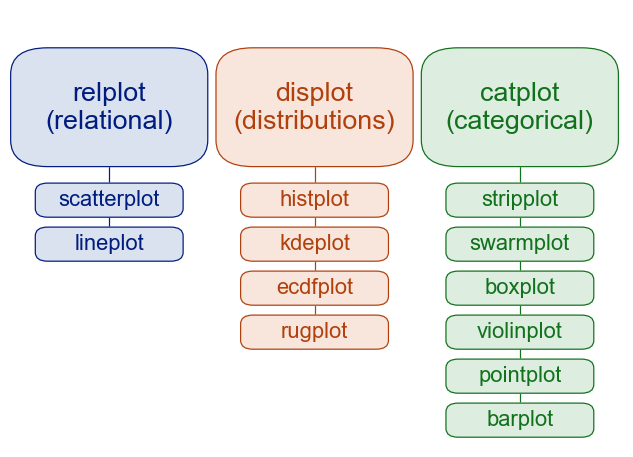

### Some same functionality as matplotlib:  for example, histogram

In [ ]:
dfsel = df[df['Day number']==10]
sns.histplot(x='Honey',data=dfsel)

Can use matplotlib object-oriented axes objects with *most* seaborn plots

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,4),sharex=True,sharey=True)

a=ax[0]
dfsel = df[df['Day number']==10]
sns.histplot(x='Median speed',data=dfsel,ax=a)
a.set_title('Day 10',fontsize=16)

a=ax[1]
dfsel = df[df['Day number']==11]
sns.histplot(x='Median speed',data=dfsel,ax=ax[1])
a.set_title('Day 11',fontsize=16)

plt.show()

note:  this is how you could generalize the above code to loop through days

In [ ]:
days_to_show = range(80,85)
f,ax=plt.subplots(1,len(days_to_show),figsize=(3*len(days_to_show),3),sharex=True,sharey=True)
for a,day in zip(ax,days_to_show):
    dfsel = df[df['Day number']==day]
    sns.histplot(x='Median speed',data=dfsel,ax=a,stat='probability')  # opt
    a.set_title('Day '+str(day),fontsize=16)
plt.show()

## Figure-level seaborn plot object:  FacetGrid  

In [ ]:
# note that it doesn't work this way!  i.e. it doesn't plot on these axes that are already created
f,ax=plt.subplots(1,1)
dfsel = df[df['Day number']==80]
sns.displot(x='Median speed',data=dfsel,ax=ax)

In [ ]:
# create a grid of histograms
dfsel = df[df['Day number'].isin(range(80,85))]
sns.displot(x='Median speed',data=dfsel,col='Day number')

Can set some properties very simply in the plot grid

In [ ]:
dfsel = df[df['Day number'].isin(range(80,100))]
# set the height and aspect ratio when calling
g = sns.displot(x='Median speed',data=dfsel,col='Day number',col_wrap=10,height=2.5,aspect=0.8,stat='probability')

g.set_xlabels('Median speed\n(pixels/sec)',fontsize=16)
g.set_ylabels('Prob. density',fontsize=16)

Can access the fig and axes objects of the plots, in order to use matplotlib-style commands to set properties.
 (note the slight difference: now the x axis is shared, where above it was not (note the ticks above).  Here, this is due to the default option when not setting height and aspect.  So, you can see there are often specific things to watch for!)

In [ ]:
dfsel = df[df['Day number'].isin(range(80,100))]
# set the height and aspect ratio when calling
col_wrap = 10
g = sns.displot(x='Median speed',data=dfsel,col='Day number',col_wrap=col_wrap,stat='probability')
g.figure.set_size_inches(2.5*10*0.8,5)
ax = np.reshape(g.axes,(-1,col_wrap))  # make the axes array have a 2D shape (don't have to do - but this is what matplotlib would have)
for a in ax[-1]:
    a.set_xlabel('Median speed\n(pixels/sec)',fontsize=16)
for a in ax[:,0]:
    a.set_ylabel('Prob. density',fontsize=16)

plt.subplots_adjust(hspace=0.3)

## Multiple conditionally-selected data
Examples:\
Figure-level and axes-level functions\
"Hue" for different selections (histplot, lineplot, boxplot - axes-level)\
Figure-level functions that can use these:  displot, relplot, catplot


Seaborn has easy options to make exploratory plots very easily. For example, make multiple histograms, according to cohort

### Histogram

In [ ]:
dfsel = df[df['Cohort ID'].isin(range(10,15))]
sns.histplot(x='Brood care',hue='Cohort ID',data=dfsel)

Use displot (figure-level function) to do a similar thing, but in a grid

In [ ]:
dfsel = df[df['Cohort ID'].isin(range(10,15))]
sns.displot(x='Brood care',data=dfsel,hue='Cohort ID',col='Cohort ID',kind='hist')

Other type of plot is kernel density estimation (kde).  
(there is also ecdf = empirical cumulative distribution function)

In [ ]:
dfsel = df[df['Cohort ID'].isin(range(10,15))]
sns.displot(x='Brood care',data=dfsel,hue='Cohort ID',col='Cohort ID',kind='kde')

### Lineplot

In [ ]:
dfsel = df[df['Cohort ID'].isin(range(10,15))]
sns.lineplot(x='Age',y='Honey',hue='Cohort ID',data=dfsel,errorbar='ci')

In [ ]:
# recall, can use shift+tab to see information about a function, or run this:
# sns.lineplot?

In [ ]:
# note the errorbars, and what they represent
sns.lineplot(x='Age',y='Honey',hue='Cohort ID',data=dfsel,errorbar='sd')

Use relplot to do a similar thing.\
replot can also have type 'scatter'

In [ ]:
dfsel = df[df['Cohort ID'].isin(range(10,15))]
sns.relplot(x='Age',y='Honey',hue='Cohort ID',col='Cohort ID',data=dfsel,errorbar='sd',kind='line')
sns.relplot(x='Age',y='Honey',hue='Cohort ID',col='Cohort ID',data=dfsel,kind='scatter')

### *Q: Lineplots - multiple cases
Plot the mean values of 'Brood care' and 'Honey' during the whole time period

### Boxplot / violinplot

In [ ]:
dfsel = df[df['Age']<=20]
f,ax = plt.subplots(1,1)
sns.boxplot(y='Frame 5',x='Age',data=dfsel,ax=ax,showfliers=False)
# doing this to convert tick labels to float
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([int(float(l.get_text())) for l  in ax.get_xticklabels()]);  

Boxplot with hue

In [ ]:
dfsel = df[df['Age']<=20].copy()
# cohorts 8 and 10 are honey bee drones (male reproductives)
dfsel['IsDrone'] = dfsel['Cohort ID'].isin([8,10])
f,ax = plt.subplots(1,1)
f.set_size_inches(10,4)
sns.boxplot(y='Frame 5',x='Age',hue='IsDrone',data=dfsel,ax=ax,showfliers=False)
# doing this to convert tick labels to float
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels([int(float(l.get_text())) for l  in ax.get_xticklabels()]);  

catplot for figure-level figure.  
kind, possible values:  "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count"

In [ ]:
g = sns.catplot(y='Frame 5',x='Age',hue='IsDrone',data=dfsel,kind='box',aspect=2.5,height=4,showfliers=False)

Catplot can have different kinds, like displot

In [ ]:
# dfsel = df[(df['Cohort ID'].isin([10,11]))&(df['Age']<=20)]
dfsel = df[df['Age']<=20].copy()
# cohorts 8 and 10 are honey bee drones (male reproductives)
dfsel['IsDrone'] = dfsel['Cohort ID'].isin([8,10])
sns.catplot(x='Age',y='Honey',col='IsDrone',data=dfsel,height=4,aspect=2,showfliers=False,kind='box')
sns.catplot(x='Age',y='Honey',col='IsDrone',data=dfsel,height=4,aspect=2,kind='violin')
sns.catplot(x='Age',y='Honey',col='IsDrone',data=dfsel,height=4,aspect=2,showfliers=False,kind='boxen')

## Other useful seaborn plots

### regplot:  Regression fit and plot

This is an axes-level function

In [ ]:
dfsel = df[df['Day number']==20]
f,ax = plt.subplots(1,1)
sns.regplot(x='Median speed',y='Dispersion (avg)',data=dfsel,scatter=True,ax=ax)

It turns out - there is one more figure-level function that has this same functionality:
lmplot

In [ ]:
dfsel = df[df['Day number'].isin(range(10,25))].copy()
dfsel['IsDrone'] = dfsel['Cohort ID'].isin([8,10])
g = sns.lmplot(x='Median speed',y='Dispersion (avg)',data=dfsel,scatter=True,col='Day number',col_wrap=5,hue='IsDrone',facet_kws={'sharex':True,'sharey':True})
# change the axes limits, because they are too large with outliers
g.figure.axes[0].set_xlim([0,60])
g.figure.axes[0].set_ylim([0,1500])

### heatmap - example with correlations

In [ ]:
# calculate correlation matrix
metrics = ['Age','Honey','Brood care','Frame 5','Median speed','Dispersion (avg)','Time outside day1min']
correlation_matrix = df[metrics].corr()
# Set diagonal elements to NaN.  There are multiple ways one could do this
for i in range(correlation_matrix.shape[0]):
    correlation_matrix.iloc[i,i] = np.nan
v = np.max(np.abs(correlation_matrix))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',vmin=-v,vmax=v)

### jointplot and pairplot: Other seaborn types to plot relationships between variables

jointplot

In [ ]:
dfsel = df[df['Day number'].isin(range(10,15))].copy()
dfsel['IsDrone'] = dfsel['Cohort ID'].isin([8,10])
g = sns.jointplot(x='Median speed',y='Dispersion (avg)',data=dfsel,hue='IsDrone')

pairplot plot relationships among variables

In [ ]:
dfsel = df[df['Day number'].isin(range(10,15))].copy()
dfsel['IsDrone'] = dfsel['Cohort ID'].isin([8,10])
dfsel = dfsel[::10]  # skip entries to make plotting faster
metrics = ['Age','Honey','Brood care','Frame 5','Median speed','Dispersion (avg)','Time outside day1min','IsDrone']
g = sns.pairplot(dfsel[metrics], hue="IsDrone",diag_kind="hist", height=2.5,kind='scatter')

this is actually a special instance of PairGrid, which can be used with more options

In [ ]:
dfsel = df[df['Day number'].isin(range(10,15))].copy()
dfsel['IsDrone'] = dfsel['Cohort ID'].isin([8,10])
dfsel = dfsel[::10]  # skip entries to make plotting faster
xmetrics = ['Age','Honey','Brood care','Frame 5']
ymetrics = ['Median speed','Dispersion (avg)','Time outside day1min']

# make some different types
g = sns.PairGrid(dfsel,x_vars=xmetrics,y_vars=ymetrics,hue="IsDrone")
# change these to make different types
g.map(sns.regplot)
# g.map(sns.lineplot)
# g.map(sns.scatterplot)
